In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#IMPORTING DATASET
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs') 
df=dataset['train'].to_pandas()

#CLEANING THE DATA
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast
#convert the column of job_skill in the dataframe to a list(initially it was in the datatype string)
#it can be carried out by ast.literaleval
def clean_string(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return skill_list
df['job_skills']=df['job_skills'].apply(clean_string)


In [9]:
df_exploded=df.explode('job_skills') #it will help breaking down individually the list of job_skills and will duplicate the columns 


In [12]:
skill_count=df_exploded.groupby(['job_title_short','job_skills']).size()

In [17]:
#to transform the above seres to dataframe we use reset index
df_skill_count=skill_count.reset_index(name='skill_count')
df_skill_count=df_skill_count.sort_values(by='skill_count', ascending=False)

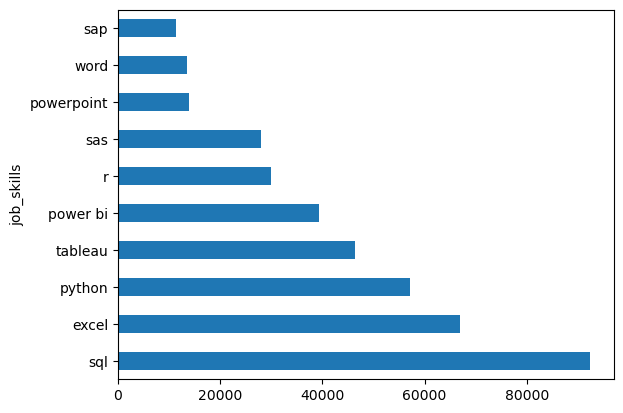

In [26]:
#Plot top 10 skills for data analyst
skill='Data Analyst'
top_skills=10
df_top_skills=df_skill_count[df_skill_count['job_title_short']==skill].head(top_skills)
df_top_skills
df_top_skills.plot(kind='barh', x='job_skills', y='skill_count')
plt.legend().set_visible(False)